In [1]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read the dataset using pandas
data = pd.read_csv('D:\Collage\DEPI\Regression\data\Salary_Data.csv')

In [3]:
# This displays the top 5 rows of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
# this describes the basic stat behind the dataset used 
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


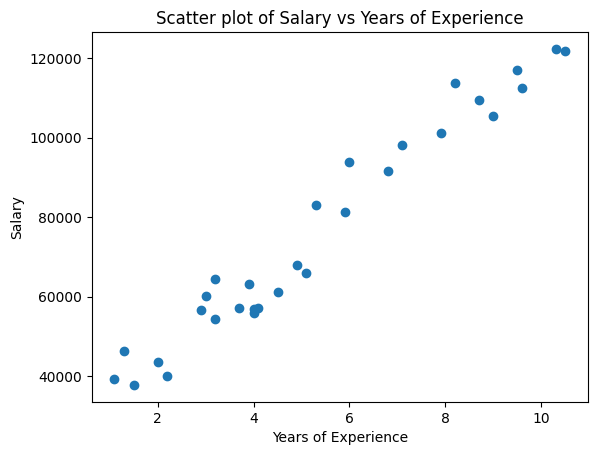

In [6]:
# These Plots help to explain the values and how they are scattered
x = data['YearsExperience']
y =data['Salary']
plt.scatter(x,y)
plt.title('Scatter plot of Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
# Plot a scatter plot
plt.show() 

c:\Users\Victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


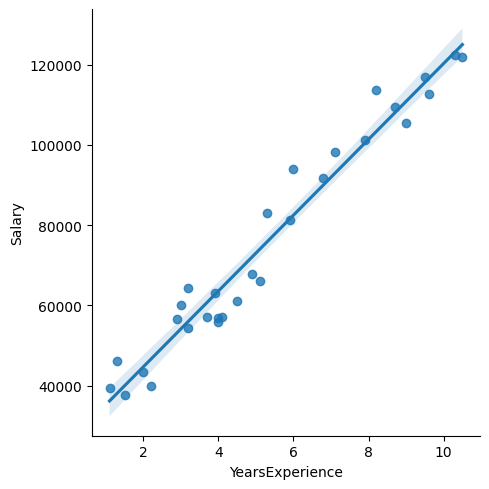

In [14]:
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = data)
plt.show()

In [7]:
# Cooking the data
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [8]:
# Cooking the data
y = data['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [37]:
# Split the data for train and test (70% for training)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [30]:
X_train.head()

0     1.1
4     2.2
16    5.1
5     2.9
13    4.1
Name: YearsExperience, dtype: float64

In [32]:
X_train.shape

(21,)

In [35]:
X_train = X_train.values.reshape(-1, 1)

In [15]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [39]:
# Fitting the model
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), Y_train)

LinearRegression()

In [42]:
# Predicting the Salary for the Test values
y_pred = regressor.predict(X_test.values.reshape(-1,1))
y_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [51]:
def plot_results(x,y):
    x = x.values.reshape(-1,1)
    plt.scatter(x,y, color = 'red')
    plt.plot(x,regressor.predict(x), color = 'blue')
    plt.title("Salary Vs Experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.show()

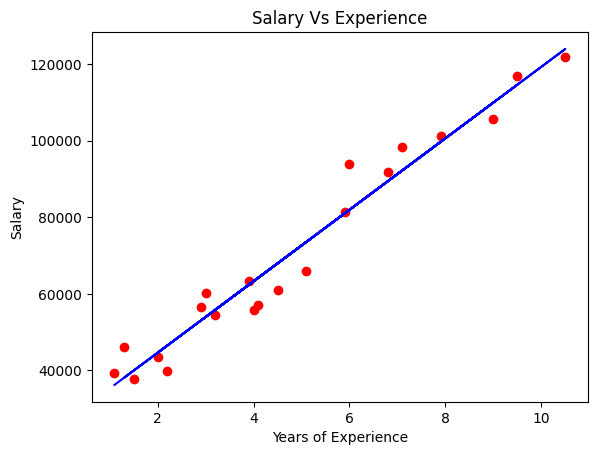

In [52]:
#training plot
plot_results(X_train, Y_train)

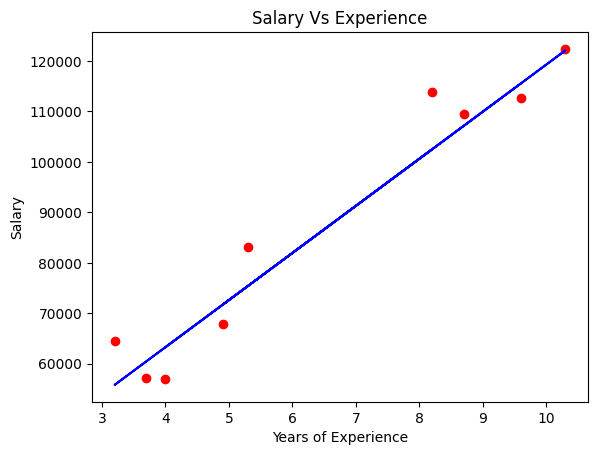

In [53]:
#testing  plot 
plot_results(X_test, Y_test)

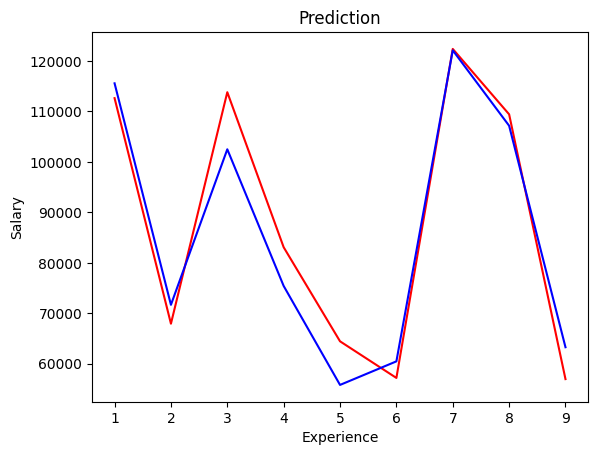

In [77]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Prediction')
plt.show()

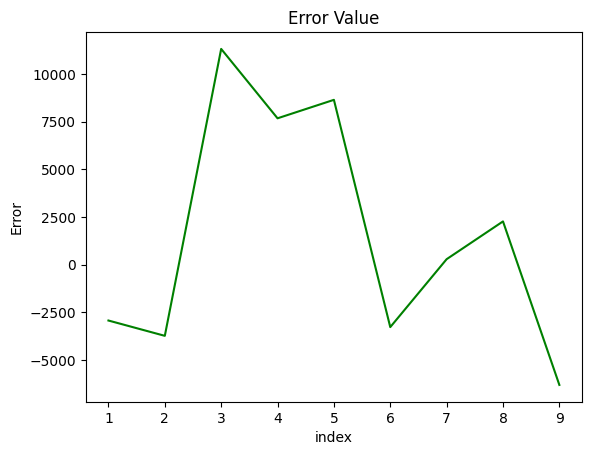

In [73]:
# plotting the error
c = [i for i in range(1,len(Y_test)+1,1)]
plt.plot(c,Y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [58]:
# Importing r2_score and mean_squared_error for the evaluation of the model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [68]:
# calculate Mean square error
MSE = mean_squared_error(Y_test, y_pred)
print("Testing Mean Square Error: ", MSE)

Testing Mean Square Error:  37784662.46621314


In [69]:
y_train_pred = regressor.predict(X_train.values.reshape(-1,1))

In [70]:
#training Error
MAE = mean_absolute_error(Y_train, y_train_pred)
print(f"Trining Mean Absolute Error = {MAE}")

Trining Mean Absolute Error = 4443.338173029782


In [71]:
#teest Error
MAE = mean_absolute_error(Y_test, y_pred)
print(f"Test Mean Absolute Erro = {MAE}")

Test Mean Absolute Erro = 5161.328710400183


In [56]:
# Calculate R square vale
score = r2_score(Y_test, y_pred)
print("R square value: ", score)

R square value:  0.9414466227178214


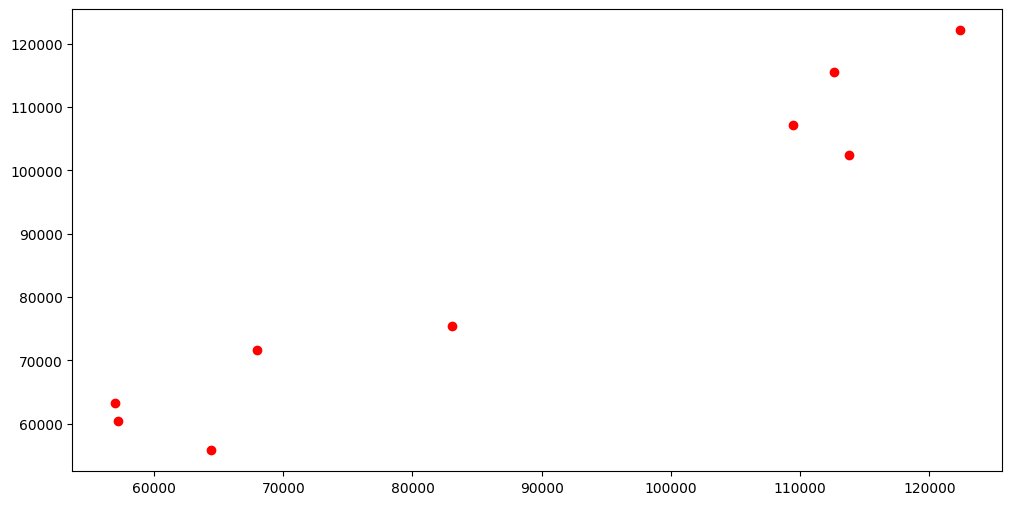

In [74]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(12,6))
plt.scatter(Y_test,y_pred,color='r',linestyle='-')
plt.show()

In [75]:
# Intecept and coeff of the line
print('Intercept of the model:',regressor.intercept_)
print('Coefficient of the line:',regressor.coef_)

Intercept of the model: 25918.438334893202
Coefficient of the line: [9339.08172382]


![](http://)Then it is said to form a line with
# y = 25918.4 + 9339.1x